# Часть 1: K-Means
## Кластеризация исполнителей по жанрам

В этом задании вы попробуете кластеризовать исполнителей по жанрам на основе данных о прослушивании.

В матрице sample_matrix по строкам стоят пользователи, а по столбцам - исполнители.

Для каждой пары (пользователь,исполнитель) в таблице стоит число - доля (процент) прослушивания этого исполнителя выбранным пользователем.

## Импорт библиотек, загрузка данных

In [267]:
import pandas as pd
import numpy as np
from scipy import spatial

In [195]:
ratings = pd.read_excel("https://github.com/evgpat/edu_stepik_rec_sys/blob/main/datasets/sample_matrix.xlsx?raw=true", engine='openpyxl')

In [196]:
ratings.head()

,user,the beatles,radiohead,deathcab for cutie,coldplay,modest mouse,sufjan stevens,dylan. bob,red hot clili peppers,pink fluid,...,municipal waste,townes van zandt,curtis mayfield,jewel,lamb,michal w. smith,群星,agalloch,meshuggah,yellowcard
0,0,NaN,0.020417,NaN,NaN,NaN,NaN,NaN,0.030496,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,0.184962,0.024561,NaN,NaN,0.136341,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,0.028635,NaN,NaN,NaN,0.024559,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0.043529,0.086281,0.034590,0.016712,0.015935,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Задание

Транспонируем матрицу ratings, чтобы по строкам стояли исполнители.

In [197]:
ratings = ratings.T

Выкиньте строку под названием `user`.

In [198]:
ratings[:3]

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
user,0.000000,1.000000,2.0,3.0,4.000000,5.000000,6.0,7.0,8.000000,9.000000,...,4990.000000,4991.0,4992.000000,4993.000000,4994.000000,4995.000000,4996.0,4997.000000,4998.0,4999.0
the beatles,NaN,NaN,NaN,NaN,0.043529,NaN,NaN,NaN,0.093398,0.017621,...,NaN,NaN,0.121169,0.038168,0.007939,0.017884,NaN,0.076923,NaN,NaN
radiohead,0.020417,0.184962,NaN,NaN,0.086281,0.006322,NaN,NaN,NaN,0.019156,...,0.017735,NaN,NaN,NaN,0.011187,NaN,NaN,NaN,NaN,NaN


In [199]:
ratings.drop(labels='user', axis=0, inplace=True)

## Вопрос для Quiz

Сколько строк осталось в матрице ratings?

In [200]:
ratings.shape

(1000, 5000)

Заполните пропуски нулями.

In [201]:
ratings.fillna(0, inplace=True)

Нормализуйте данные при помощи `normalize`.

In [202]:
from sklearn.preprocessing import normalize

norm_data = normalize(ratings)

In [203]:
cols = ratings.columns
idx = ratings.index

In [204]:
norm_data = pd.DataFrame(data=norm_data, columns=cols, index=idx)

In [205]:
norm_data[:3]

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
the beatles,0.000000,0.000000,0.000000,0.0,0.012054,0.000000,0.0,0.0,0.025864,0.004880,...,0.000000,0.0,0.033554,0.010569,0.002199,0.004952,0.0,0.021302,0.0,0.000000
radiohead,0.009348,0.084688,0.000000,0.0,0.039505,0.002894,0.0,0.0,0.000000,0.008771,...,0.008120,0.0,0.000000,0.000000,0.005122,0.000000,0.0,0.000000,0.0,0.000000
deathcab for cutie,0.000000,0.017278,0.020144,0.0,0.024333,0.000000,0.0,0.0,0.000000,0.009391,...,0.085361,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.019622


Примените KMeans с 5ю кластерами на преобразованной матрице (сделайте fit, а затем вычислите кластеры при помощи predict).

In [206]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=5)

In [207]:
model.fit(norm_data)

KMeans(n_clusters=5)

In [208]:
clasters = model.predict(norm_data)

Выведите на экран центры кластеров (центроиды)

In [209]:
np.unique(clasters)

array([0, 1, 2, 3, 4])

In [210]:
centroids = model.cluster_centers_

In [211]:
#centroids[0].shape

In [212]:
#norm_data.values[0].shape

In [244]:
norm_data_with_claster = norm_data.copy()
norm_data_with_claster['claster'] = clasters

In [265]:
norm_data_with_claster[:3]

,0,1,2,3,4,5,6,7,8,9,...,4991,4992,4993,4994,4995,4996,4997,4998,4999,claster
the beatles,0.000000,0.000000,0.000000,0.0,0.012054,0.000000,0.0,0.0,0.025864,0.004880,...,0.0,0.033554,0.010569,0.002199,0.004952,0.0,0.021302,0.0,0.000000,1
radiohead,0.009348,0.084688,0.000000,0.0,0.039505,0.002894,0.0,0.0,0.000000,0.008771,...,0.0,0.000000,0.000000,0.005122,0.000000,0.0,0.000000,0.0,0.000000,2
deathcab for cutie,0.000000,0.017278,0.020144,0.0,0.024333,0.000000,0.0,0.0,0.000000,0.009391,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.019622,4


In [258]:
dist_to_claster = {k:[] for k in np.unique(clasters)}
for idx, row in norm_data_with_claster.iterrows():
    for claster, center in enumerate(centroids):
        dist = spatial.distance.cosine (row.values[:-1], center)
        dist_to_claster[claster].append((idx, dist, row.values[-1]))

In [259]:
for key in dist_to_claster.keys():
    dist_to_claster[key] = sorted(dist_to_claster[key], key=lambda x: x[1])

In [268]:
for key in dist_to_claster.keys():
    dist_to_claster[key] = dist_to_claster[key][:10]

In [269]:
dist_to_claster

{0: [('metallica', 0.6964360896578804, 0.0),
  ('system of a down', 0.7032612586817265, 0.0),
  ('\u200clinkin park', 0.7293864063565447, 0.0),
  ('koЯn', 0.7294932202890299, 0.0),
  ('niИ', 0.7380313003795351, 0.0),
  ('tool', 0.7438304551661599, 0.0),
  ('foo fighters', 0.752744994634014, 0.0),
  ('red hot clili peppers', 0.7531800834777556, 0.0),
  ('ratm', 0.7572340601704436, 0.0),
  ('disturbed', 0.7597908407637797, 0.0)],
 1: [('velvet underground', 0.6551299586627073, 1.0),
  ('the beatles', 0.6592398267269624, 1.0),
  ('the rolling stones', 0.6610477429836403, 1.0),
  ('dylan. bob', 0.6618527148855038, 1.0),
  ('sonic youth', 0.6924800580686696, 1.0),
  ('the clash', 0.7029997115310131, 1.0),
  ('divid bowie', 0.7212023123848794, 1.0),
  ('the pixies', 0.7215959755380263, 1.0),
  ('the smiths', 0.7249612345532332, 1.0),
  ('the kinks', 0.7296051389138557, 1.0)],
 2: [('radiohead', 0.5966684797032713, 2.0),
  ('the arcade fire', 0.6022603479433877, 2.0),
  ('sufjan stevens', 0.6

Для каждого кластера найдем топ-10 исполнителей, наиболее близких к центроидам соотвествующего кластера.

Схожесть исполнителей будем считать по косинусной мере (spatial.distance.cosine).

## Quiz

Вычислите расстояние между "the beatles" и "coldplay". Ответ округлите до сотых.


In [271]:
spatial.distance.cosine(norm_data.loc['the beatles'], norm_data.loc['coldplay'])

0.8955669648278295

Ниже для вашего удобства написана функция, принимающая на вход:
* np.array points - все точки кластера
* pt - центроид кластера
* K = 10 - число
Функция возвращает K индексов объектов (строк в массиве points), ближайших к центроиду.

In [ ]:
def pClosest(points, pt, K=10):
    ind = [i[0] for i in sorted(enumerate(points), key=lambda x: spatial.distance.cosine(x[1], pt))]
 
    return ind[:K]

Примените функцию pClosest (или придумайте свой подход) и выведите для каждого кластера названия топ-10 исполнителей, ближайших к центроиду.

In [ ]:
# ваш код здесь

## Quiz

Проинтерпретируйте результат. Что можно сказать о смысле кластеров?

# Часть 2: сравнение алгоритмов кластеризации

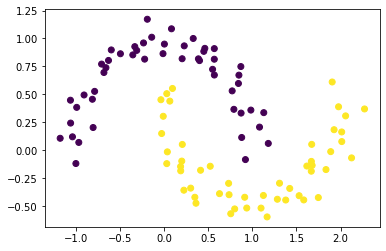

In [272]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_moons

data = make_moons(n_samples=100, noise=0.1, random_state=42)

X = data[0]
y = data[1]

plt.scatter(X[:,0], X[:,1], c=y)

Далее вы попробуете разные кластеризации для поиска кластеров. Также замеряйте время работы каждого метода.

Попробуйте найти кластеры при помощи KMeans

In [276]:
model = KMeans(n_clusters=2)

In [277]:
model.fit(data[0])

KMeans(n_clusters=2)

In [279]:
pred_clasters = model.predict(data[0])

In [282]:
pred_true = list(zip(pred_clasters, data[1]))

In [284]:
x_ = data[0]
y_pred = pred_clasters

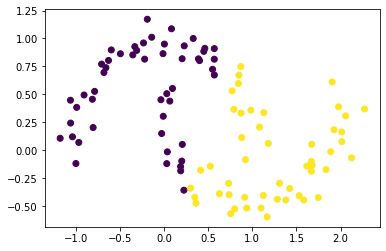

In [285]:
x_ = data[0]
y = y_pred

plt.scatter(x_[:,0], x_[:,1], c=y)

## Quiz

Подберите $\varepsilon$ и min_samples в DBSCAN, чтобы наилучшим образом найти кластеры.
Ищите гиперпараметры из диапазонов:
* eps in [0.05, 0.1, 0.2, 0.28, 0.3, 0.32]
* min_samples in [4, 5, 6, 7]

In [288]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import accuracy_score

In [296]:
best_eps = 0
best_min_samples = 0
max_accuracy = 0
for eps in [0.05, 0.1, 0.2, 0.28, 0.3, 0.32]:
    for min_samples in [4, 5, 6, 7]:
        model = DBSCAN(eps=eps, min_samples=min_samples)
        pred = model.fit(data[0]).labels_
        if accuracy_score(data[1], pred) > max_accuracy:
            max_accuracy = accuracy_score(data[1], pred)
            best_eps = eps
            best_min_samples = min_samples

In [299]:
max_accuracy

0.5

In [309]:
accuracy_score(data[1], DBSCAN(eps=0.28, min_samples=4).fit(data[0]).labels_)

0.0

In [310]:
DBSCAN(eps=0.28, min_samples=4).fit(data[0]).labels_

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0], dtype=int64)

In [311]:
data[1]

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1], dtype=int64)

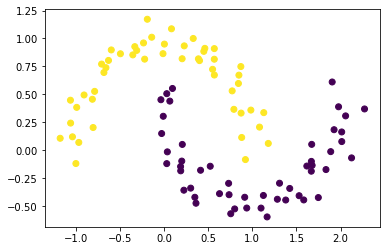

In [308]:
x_ = data[0]
y = DBSCAN(eps=0.28, min_samples=4).fit(data[0]).labels_

plt.scatter(x_[:,0], x_[:,1], c=y)

## Quiz

Используйте иерархическую кластеризацию для поиска кластеров.
Задайте в методе 2 кластера. Подберите гиперпараметр linkage из списка ['ward', 'complete', 'average', 'single'], дающий наилучший результат.

In [313]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
model = AgglomerativeClustering(n_clusters=2)

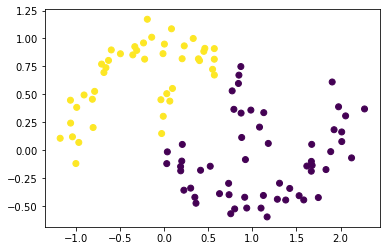

In [332]:
x_ = data[0]
y = AgglomerativeClustering(n_clusters=2, linkage='average').fit(data[0]).labels_

plt.scatter(x_[:,0], x_[:,1], c=y)

## Quiz

Попробуйте найти кластеры при помощи спектральной кластеризации.
Задайте 2 кластера, affinity='nearest_neighbors'. Подберите гиперпараметр n_neighbors из диапазона [1,2,...,19], чтобы добиться наилучшего результата.

In [317]:
from sklearn.cluster import SpectralClustering

In [318]:
model = SpectralClustering(n_clusters=2)

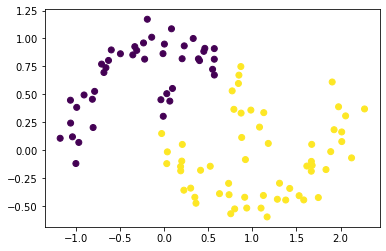

In [328]:
x_ = data[0]
y = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', n_neighbors=13).fit(data[0]).labels_

plt.scatter(x_[:,0], x_[:,1], c=y)

## Quiz

Сделайте выводы: какой метод сработал лучше других? какой метод сработал быстрее? есть ли метод, наилучший и по качеству, и по времени одновременно?